To prepare this notebook, I have taken reference from https://analyticsindiamag.com/ad-click-through-rate-ctr-prediction-using-reinforcement-learning/

# Problem Statement

We will see the practical implementation of `Upper Confidence Bound (UCB)`, a method of reinforcement learning applied in this task. Using this implementation, one can be able to find the best version of the advertisement from a set of available versions that can get a maximum number of clicks by the visitors on the website.

There are almost all the websites over the internet which display ads. The companies who wish to advertise their products, choose these web places as a medium of advertisement. The challenge is that if the company has a range of advertisement versions, which among these versions can get the highest conversion rate, i.e. the maximum number of clicks on the ad.

**The Upper Confidence Bound (UCB) Method**
The Upper Confidence Bound (UCB) algorithm belongs to the family of Reinforcement Learning algorithms. This method is applied in action selection where it uses uncertainty in the action value estimates for balancing exploration and exploitation. This method is popularly used in solving the Multi-Arm Bandit Problem.

# Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# Data Exploration

In [3]:
data.shape

(10000, 10)

In [4]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [6]:
data.isna().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

# Random Selection Method

To see the difference, first, we need to see how random selection of ad versions works. From the set of 10 ad versions, one ad is selected at random and displayed to the visitor. 

In [7]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward = total_reward + reward

Once the above code snippet is executed, the above algorithm selects one ad at a random and displays before the visitor. If the visitor clicks on the ad, the reward 1 is added and if the visitor ignores it, the rewarded 0 is added. 

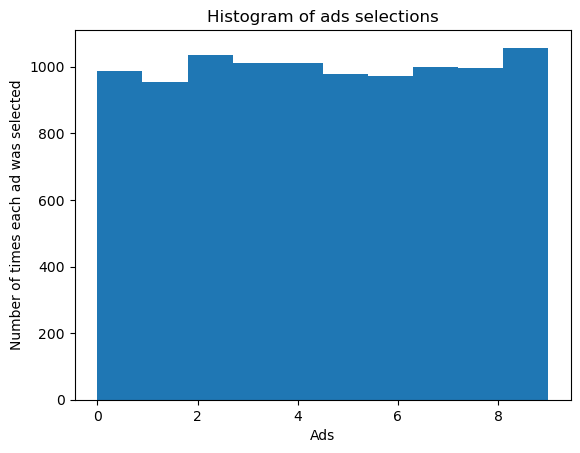

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# UCB Method


In [9]:
# Upper Confidence Bound
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

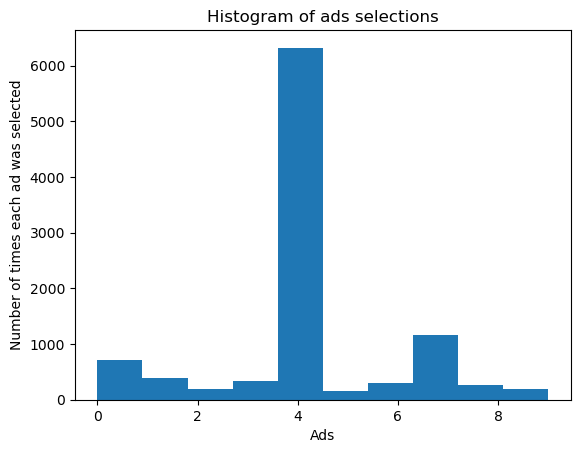

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Conclusion

The total reward received when using UCB algorithm is nearly double the total reward received in random selection. Finally, we can conclude that the Upper Confidence Bound (UCB) algorithm helps in finding the best ad from a set of ad versions to be displayed to visitors so that maximum click and highest conversion rate can be obtained. Using this number of clicks on each of the ads and using the number of impressions, one can easily find out the Click-Through Rate (CTR) of these ads. The CTR can be obtained as (Total No.of Clicks / Total Impression) x 100.